In [13]:
import numpy


In [12]:
import numpy as np
from PIL.Image import fromarray
from IPython import get_ipython
from IPython.display import display_html


def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print("<array of shape {}>".format(obj.shape))

    get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)


In [14]:
display_np_arrays_as_images()

In [16]:
ims = numpy.load('./test_images.npy', allow_pickle=False)

In [18]:
# we'll use three operations
from einops import rearrange, reduce, repeat

In [35]:
x = reduce(ims, 'b h w c -> b () () c', 'mean') + ims

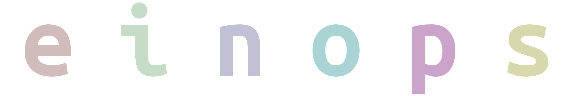

In [36]:
rearrange(x, 'b h w c -> h (b w) c')

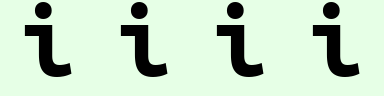

In [38]:
repeat(ims[1], 'h w c -> h (4 w) c')

In [39]:
eye = np.eye(2)

In [41]:
print(eye)

[[1. 0.]
 [0. 1.]]


In [43]:
print(repeat(eye, 'h w -> (2 h) (2 w)'))

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]


In [44]:
print(repeat(eye, 'h w -> (h 2) (w 2)'))

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


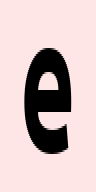

In [45]:
repeat(ims[0], 'h w c -> (h 2) w c')